## Comenzamos con Analisis Exploratorio

- Importamos las funciones que vayamos creando:

In [1]:
import os
print(os.getcwd())

c:\BOOTCAMPASUS\EDA_entrega\src\notebooks


In [3]:
os.chdir('c:/BOOTCAMPASUS/EDA_entrega/src')

In [4]:
#os.chdir('c:/Users/Usuario/REPO_BOOTCAMP/EDA_entrega/src')


In [6]:
print(os.getcwd())

c:\BOOTCAMPASUS\EDA_entrega\src


In [7]:
# Importamos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils.funciones_eda import *

In [8]:
df_online_retail_2010 = pd.read_csv("./data/online_retail_2010.csv")
df_online_retail_2010.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,3.900000,12346.0,United Kingdom,False,True,19.50,1
1,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,5.796827,14590.0,United Kingdom,True,False,5.80,1
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,3.900000,12346.0,United Kingdom,False,True,19.50,1
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,1.046759,12345.0,United Kingdom,False,True,1.05,1
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.834224,12345.0,United Kingdom,False,True,3.83,1


### Tabla de Variables

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Invoice|Numero de factura o ticket|||Hay numeros y letras|
|StockCode|Numero identificativo del producto||||
|Description|Nombre detallado del producto| | | |
|Quantity|Cantidad de producto adquirido o devuelto| | || |
|InvoiceDate| Fecha de la factura o ticket| | | |
|Price| Precio del articulo por unidad| | | |
|Customer_ID | Identificativo del cliente| | | |
|Country| Pais de donde procede el movimiento | | | |
|Devolucion| Devolucion| | | |
|Ventas| Ventas| | | |
|Precio_Total| Cuantia de la factura o ticket| | | |
|Trimestres| Trimestre al que pertenece el movimiento | | |Tenemos 4 trimestres|

In [9]:
# Cardinalidad
df_o_r_2010_tipificacion = pd.DataFrame([df_online_retail_2010.nunique(), df_online_retail_2010.nunique()/len(df_online_retail_2010) * 100, df_online_retail_2010.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                          1: "%_Card", 2: "Tipo"})
df_o_r_2010_tipificacion

,Card,%_Card,Tipo
Invoice,26164,5.451856,object
StockCode,4195,0.874122,object
Description,4037,0.841199,object
Quantity,514,0.107103,int64
InvoiceDate,23113,4.816111,object
Price,3840,0.80015,float64
Customer_ID,4259,0.887458,float64
Country,40,0.008335,object
Devolucion,2,0.000417,bool
Ventas,2,0.000417,bool


In [10]:
# Sigamos con la cardinalidad y los tipos:

cardinalidad(df_online_retail_2010, 10, 30)

,Columna,Cardinalidad,Porcentaje Cardinalidad,Tipo
0,Invoice,26164,5.451856,Numérica Discreta
1,StockCode,4195,0.874122,Numérica Discreta
2,Description,4037,0.841199,Numérica Discreta
3,Quantity,514,0.107103,Numérica Discreta
4,InvoiceDate,23113,4.816111,Numérica Discreta
5,Price,3840,0.800150,Numérica Discreta
6,Customer_ID,4259,0.887458,Numérica Discreta
7,Country,40,0.008335,Numérica Discreta
8,Devolucion,2,0.000417,Binaria
9,Ventas,2,0.000417,Binaria


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Invoice|Numero de factura o ticket|Numerica Discreta|3|Hay numeros y letras|
|StockCode|Numero identificativo del producto|Numerica Discreta|1||
|Description|Nombre detallado del producto|Numerica Discreta |2 | |
|Quantity|Cantidad de producto adquirido o devuelto| Numerica Discreta|3 || |
|InvoiceDate| Fecha de la factura o ticket|Numerica Discreta |3| |
|Price| Precio del articulo por unidad| Numerica Discreta|3 | |
|Customer_ID | Identificativo del cliente|Numerica Discreta |2 | |
|Country| Pais de donde procede el movimiento |Numerica Discreta |0 | |
|Devolucion| Devolucion| Binaria|0 |True or False |
|Ventas| Ventas| Binaria|0 |True or False |
|Precio_Total| Cuantia de la factura o ticket|Numerica Discreta |0 | |
|Trimestres| Trimestre al que pertenece el movimiento | Categorica|0 |Tenemos 4 trimestres|

In [12]:
# Localizamos valores minimos, maximos...

df_online_retail_2010.describe()

,Quantity,Price,Customer_ID,Precio_Total,Trimestres
count,479910.000000,479910.000000,479910.000000,479910.000000,479910.000000
mean,12.633556,4.742286,14762.242112,37.213928,2.678969
std,108.094221,123.214806,1923.423031,1156.137438,1.144138
min,1.000000,-45517.340000,12345.000000,-45517.340000,1.000000
25%,1.000000,1.432385,12826.000000,3.890000,2.000000
50%,3.000000,2.257033,14646.000000,10.700000,3.000000
75%,12.000000,4.152750,16469.000000,20.280000,4.000000
max,19152.000000,8859.906667,18287.000000,446142.630000,4.000000


In [91]:
def eliminar_outliers_iqr2(df, columnas, factor=3.5, graficar=False):
    """
    Reemplaza outliers con NaN en múltiples columnas usando IQR sin eliminar filas completas.
    
    Parámetros:
    - df: DataFrame de entrada.
    - columnas: (list) Lista de nombres de columnas a procesar.
    - factor: (float) Factor multiplicador del IQR (por defecto: 3.5).
    - graficar: (bool) Mostrar boxplots antes y después (opcional).

    Retorna:
    - DataFrame con outliers reemplazados por NaN solo en las columnas seleccionadas.
    """
    df_limpio = df.copy()
    
    for columna in columnas:
        # Calcular Q1, Q3 e IQR
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Reemplazar outliers con NaN
        df_limpio.loc[(df[columna] < lower_bound) | (df[columna] > upper_bound), columna] = np.nan

        # Graficar boxplots (opcional)
        if graficar:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            df[columna].plot(kind='box', ax=axes[0], title=f"Antes de eliminar outliers ({columna})")
            df_limpio[columna].plot(kind='box', ax=axes[1], title=f"Después de eliminar outliers ({columna})")
            plt.show()

    return df_limpio



In [77]:
columnas_outliers = ["Price", "Precio_Total", "Quantity"]

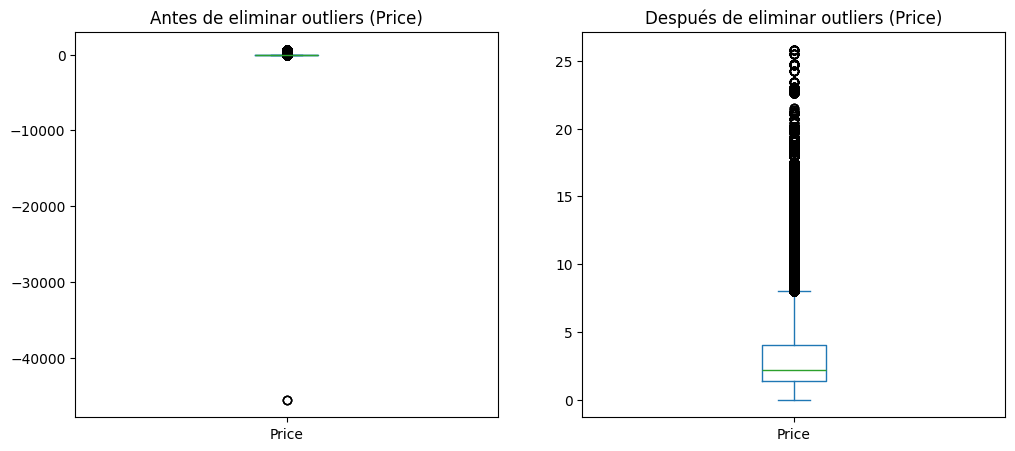

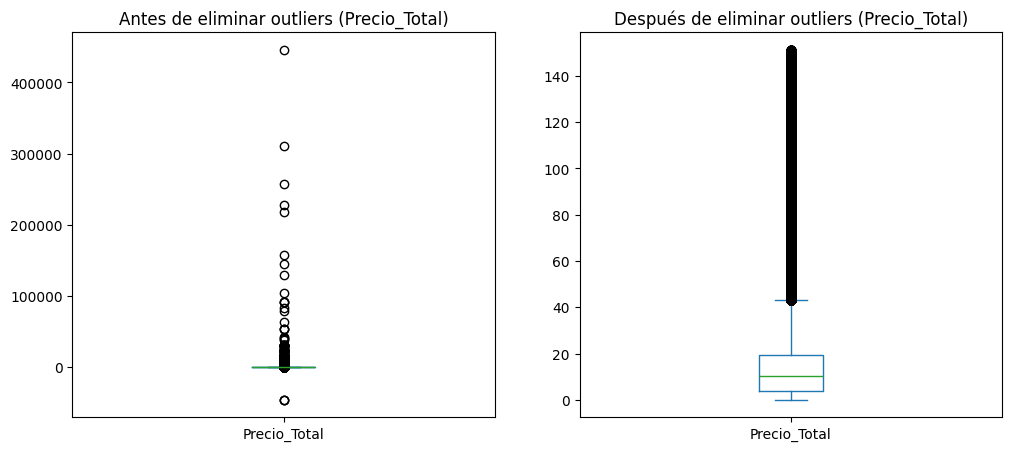

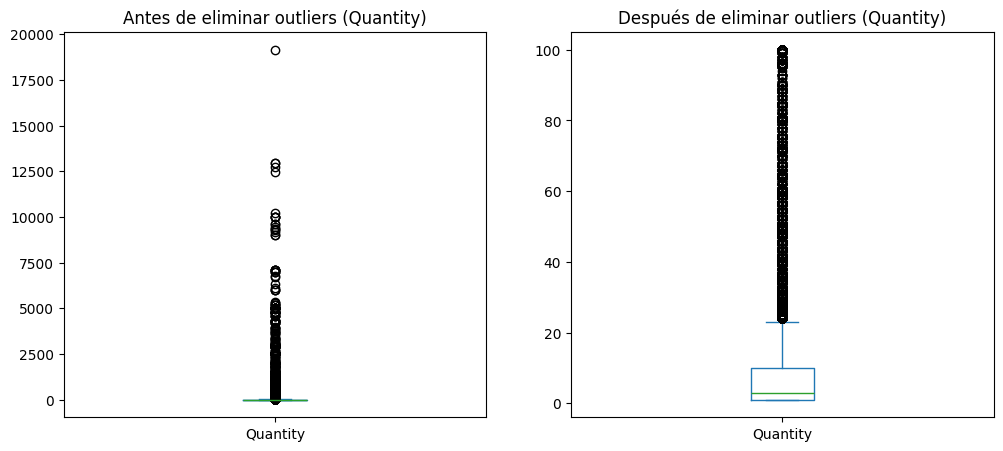

In [94]:
df_limpio = eliminar_outliers_iqr2(
    df=df_online_retail_2010, 
    columnas=columnas_outliers, 
    factor=8, 
    graficar=True  
)

In [96]:
df_limpio.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
0,493410,TEST001,This is a test product.,5.0,2010-01-04 09:24:00,3.900000,12346.0,United Kingdom,False,True,19.50,1
1,C493411,21539,RETRO SPOTS BUTTER DISH,1.0,2010-01-04 09:43:00,5.796827,14590.0,United Kingdom,True,False,5.80,1
2,493412,TEST001,This is a test product.,5.0,2010-01-04 09:53:00,3.900000,12346.0,United Kingdom,False,True,19.50,1
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1.0,2010-01-04 09:54:00,1.046759,12345.0,United Kingdom,False,True,1.05,1
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1.0,2010-01-04 09:54:00,3.834224,12345.0,United Kingdom,False,True,3.83,1


In [ ]:
# Nulos despues de la funcion
print(df_limpio.isna().sum())


Invoice             0
StockCode           0
Description         0
Quantity         5753
InvoiceDate         0
Price            3644
Customer_ID         0
Country             0
Devolucion          0
Ventas              0
Precio_Total    12239
Trimestres          0
dtype: int64


In [111]:
df_limpio = df_limpio.dropna(subset=["Price", "Precio_Total", "Quantity"])

In [112]:
df_limpio.Price = df_limpio.Price.round(2)

C:\Users\lukat\AppData\Local\Temp\ipykernel_9520\3387803236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.Price = df_limpio.Price.round(2)


In [114]:
# Limpiado los outliers
df_limpio

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
0,493410,TEST001,This is a test product.,5.0,2010-01-04 09:24:00,3.90,12346.0,United Kingdom,False,True,19.50,1
1,C493411,21539,RETRO SPOTS BUTTER DISH,1.0,2010-01-04 09:43:00,5.80,14590.0,United Kingdom,True,False,5.80,1
2,493412,TEST001,This is a test product.,5.0,2010-01-04 09:53:00,3.90,12346.0,United Kingdom,False,True,19.50,1
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1.0,2010-01-04 09:54:00,1.05,12345.0,United Kingdom,False,True,1.05,1
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1.0,2010-01-04 09:54:00,3.83,12345.0,United Kingdom,False,True,3.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...
479905,538171,22271,FELTCRAFT DOLL ROSIE,2.0,2010-12-09 20:01:00,3.21,17530.0,United Kingdom,False,True,6.41,4
479906,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1.0,2010-12-09 20:01:00,3.95,17530.0,United Kingdom,False,True,3.95,4
479907,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.0,2010-12-09 20:01:00,4.02,17530.0,United Kingdom,False,True,4.02,4
479908,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.0,2010-12-09 20:01:00,4.14,17530.0,United Kingdom,False,True,8.28,4


In [116]:
# Pongamos la columna Quantity como int
df_limpio.Quantity = df_limpio.Quantity.astype(int)

C:\Users\lukat\AppData\Local\Temp\ipykernel_9520\1731707223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.Quantity = df_limpio.Quantity.astype(int)


In [117]:
df_limpio.sample(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
419630,533333,84997C,BLUE 3 PIECE MINI DOTS CUTLERY SET,6,2010-11-16 18:07:00,3.9,16748.0,United Kingdom,False,True,23.39,4


In [115]:
df_limpio.Country.value_counts()

Country
United Kingdom          430900
EIRE                      8367
Germany                   7267
France                    5075
Netherlands               1628
Switzerland               1075
Belgium                    975
Portugal                   965
Spain                      939
Channel Islands            818
Italy                      685
Sweden                     668
Australia                  532
Austria                    474
Greece                     454
United Arab Emirates       364
Cyprus                     345
Finland                    337
Norway                     332
Denmark                    328
Unspecified                307
USA                        237
Japan                      197
Poland                     171
Malta                      167
Lithuania                  153
Singapore                  115
RSA                        108
Bahrain                    106
Canada                      77
Iceland                     71
Israel                      68


In [119]:
del df_sin_outliers

In [120]:
del df_sin_outliers2

In [121]:
df_limpio.to_csv("online_retail_limpiado.csv", index=False)

### Lo tenemos todo en orden para empezar a pintar graficas y sacar conclusiones.
    - No divagaremos e iremos directamente a por nuestros objetivos/hipótesis

· EL Q4 FUE EL TRIMESTRE CON MAS VENTAS.


In [126]:
df_filtro_ventas_true = df_limpio[df_limpio.Ventas == True]

ventas_trimestre_suma = df_filtro_ventas_true.groupby("Trimestres")["Precio_Total"].sum()

print(ventas_trimestre_suma)

Trimestres
1    1475439.82
2    1640238.06
3    1703022.62
4    2295187.36
Name: Precio_Total, dtype: float64


C:\Users\lukat\AppData\Local\Temp\ipykernel_9520\1211961141.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


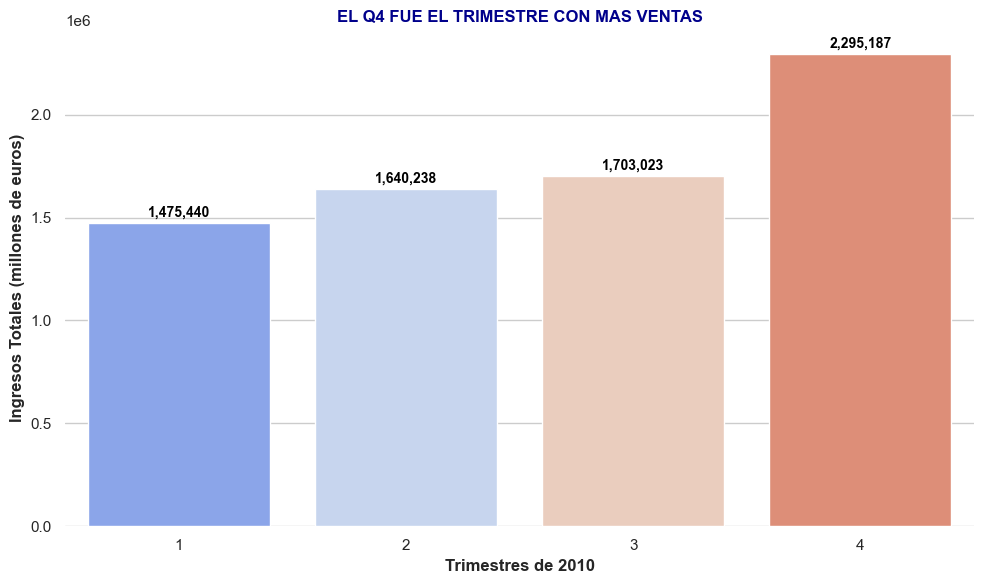

In [145]:
sns.set(style="whitegrid")
colores = sns.color_palette("coolwarm", len(ventas_trimestre_suma))

plt.figure(figsize=(10, 6))
barras = sns.barplot(
    x=ventas_trimestre_suma.index, 
    y=ventas_trimestre_suma.values, 
    palette=colores
)
for index, value in enumerate(ventas_trimestre_suma.values):
    plt.text(x=index, y=value + 50000, s=f"{value:,.0f}",
             color='black', ha='center', va='center', fontsize=10, fontweight='bold')
plt.xlabel("Trimestres de 2010", fontsize = 12, fontweight="bold")
plt.ylabel("Ingresos Totales (millones de euros)", fontsize=12, fontweight="bold")
plt.title("EL Q4 FUE EL TRIMESTRE CON MAS VENTAS", fontweight = "bold", color = "darkblue")
sns.despine(left=True, bottom=True)
plt.tight_layout()
